## Initial Setup


In [17]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
# Reading the dataset
df = pd.read_csv('online_advertising_performance_data.csv')

## Data Preprocessing


In [19]:
# print(df.info())
# print(df.describe())
# print(df.shape)
# print(df.columns)

In [20]:
# Changing the campaign_number column to just the number
df['campaign_number'] = df['campaign_number'].str.replace('camp', '')
df['campaign_number'] = df['campaign_number'].astype(int)
print(df['campaign_number'].unique())

[1 2 3]


In [21]:

# Changing User Engagement to numbers
engagement_mapping = {
    'High': 3,
    'Medium': 2,
    'Low': 1
}
df['user_engagement'] = df['user_engagement'].map(engagement_mapping)
print(df['user_engagement'].unique())

[3 1 2]


In [22]:
# Using Label Encoding for banner column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['banner_original'] = df['banner'].copy()
df['banner_encoded'] = label_encoder.fit_transform(df['banner'])

print("Original banner values:", df['banner_original'].unique())
print("Encoded banner values:", df['banner_encoded'].unique())


Original banner values: ['160 x 600' '240 x 400' '300 x 250' '468 x 60' '580 x 400' '670 x 90'
 '728 x 90' '800 x 250']
Encoded banner values: [0 1 2 3 4 5 6 7]


In [23]:
# Using Label Encoding for placement column
df['placement_original'] = df['placement'].copy()
df['placement_encoded'] = label_encoder.fit_transform(df['placement'])
print(df['placement'].unique())

['abc' 'def' 'ghi' 'mno' 'jkl' nan]


In [24]:
# Using Label Encoding for Month column
df['month'] = label_encoder.fit_transform(df['month']) 
print(df['month'].unique())

[0 2 1]


In [25]:
# Removing the last 2 unnamed columns from the dataset
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [26]:
# Handling missing values
df.isnull().sum()
# As there are no missing values, we can proceed with the analysis

month                        0
day                          0
campaign_number              0
user_engagement              0
banner                       0
placement                  413
displays                     0
cost                         0
clicks                       0
revenue                      0
post_click_conversions       0
post_click_sales_amount      0
banner_original              0
banner_encoded               0
placement_original         413
placement_encoded            0
dtype: int64

## Analyzing the Data


### What is the overall trend in user engagement throughout the campaign period?

In [27]:
# print("Unique months:", df['month'].unique())
# print("Unique days:", df['day'].unique())
# print(label_encoder.classes_)

# Creating a reverse mapping for month names
month_labels = {'April':0, 'May':1, 'June':2}
reverse_map = {v:k for k, v in month_labels.items()}

# Making another column for month names
df['month_name'] = df['month'].map(reverse_map)

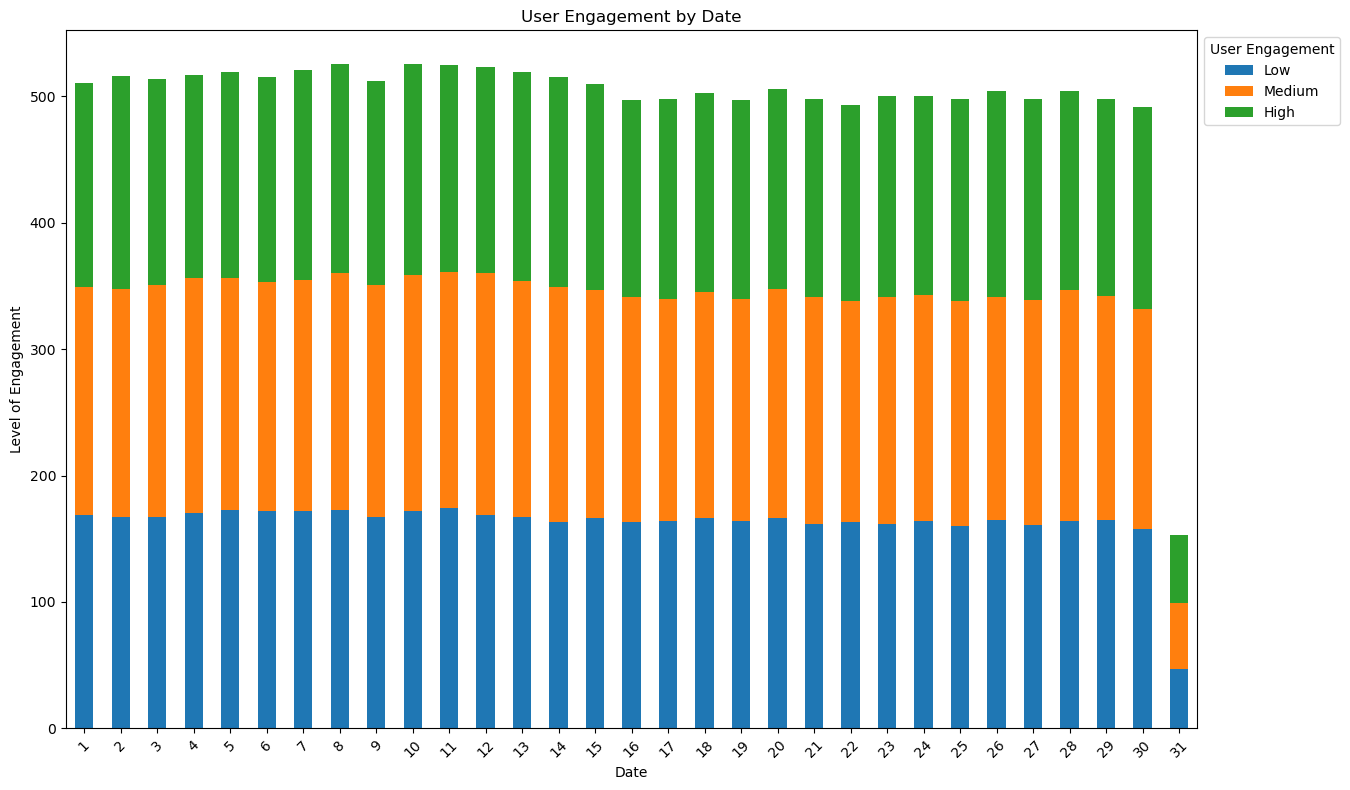

In [28]:
#Creating a visualization of user engagement by date

daily_engagement = df.groupby(['day', 'user_engagement']).size().unstack()

fig, ax = plt.subplots(figsize=(16, 8))
bars = daily_engagement.plot(kind='bar', stacked=True, ax=ax)

ax.set_title('User Engagement by Date')
ax.set_ylabel('Level of Engagement')
ax.set_xlabel('Date')
ax.set_xticklabels(daily_engagement.index, rotation=45)

ax.legend(
    labels=['Low', 'Medium', 'High'], 
    title='User Engagement',
    bbox_to_anchor=(1.0, 1.0),
    loc='upper left'
)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

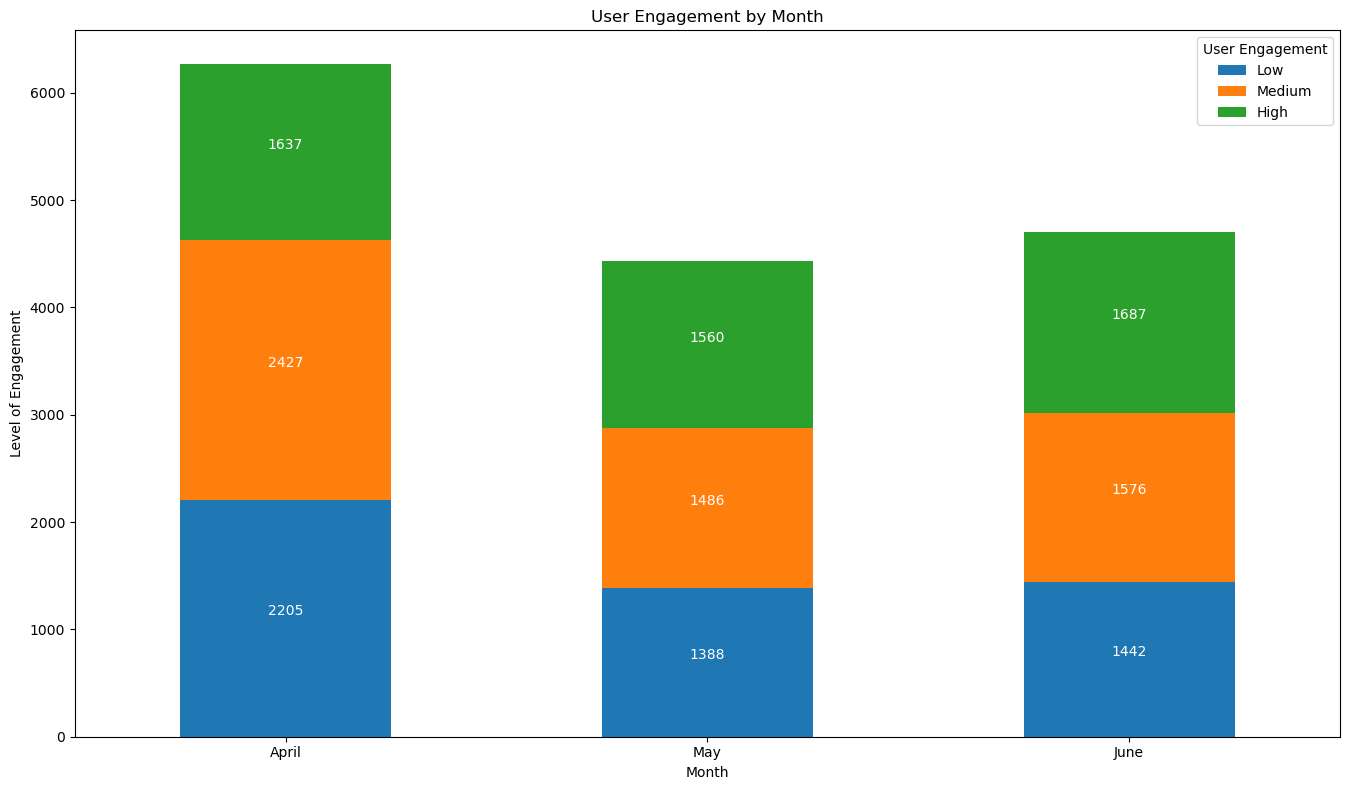

In [29]:
#Creating a visualtization of user engagement by month

monthly_engagement = df.groupby(['month_name', 'user_engagement']).size().unstack()
month_order = ['April', 'May', 'June']
monthly_engagement = monthly_engagement.loc[month_order]

fig,ax = plt.subplots(figsize=(16, 8))
bars = monthly_engagement.plot(kind='bar', stacked=True, ax=ax)

for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if(height > 0):
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_y() + height/2,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10, color='white'
            )

ax.set_title('User Engagement by Month')
ax.set_ylabel('Level of Engagement')
ax.set_xlabel('Month')
ax.set_xticklabels(monthly_engagement.index, rotation=0)

ax.legend(
    labels=['Low', 'Medium', 'High'], 
    title='User Engagement',
    bbox_to_anchor=(1.0, 1.0),
    loc='upper right'
)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

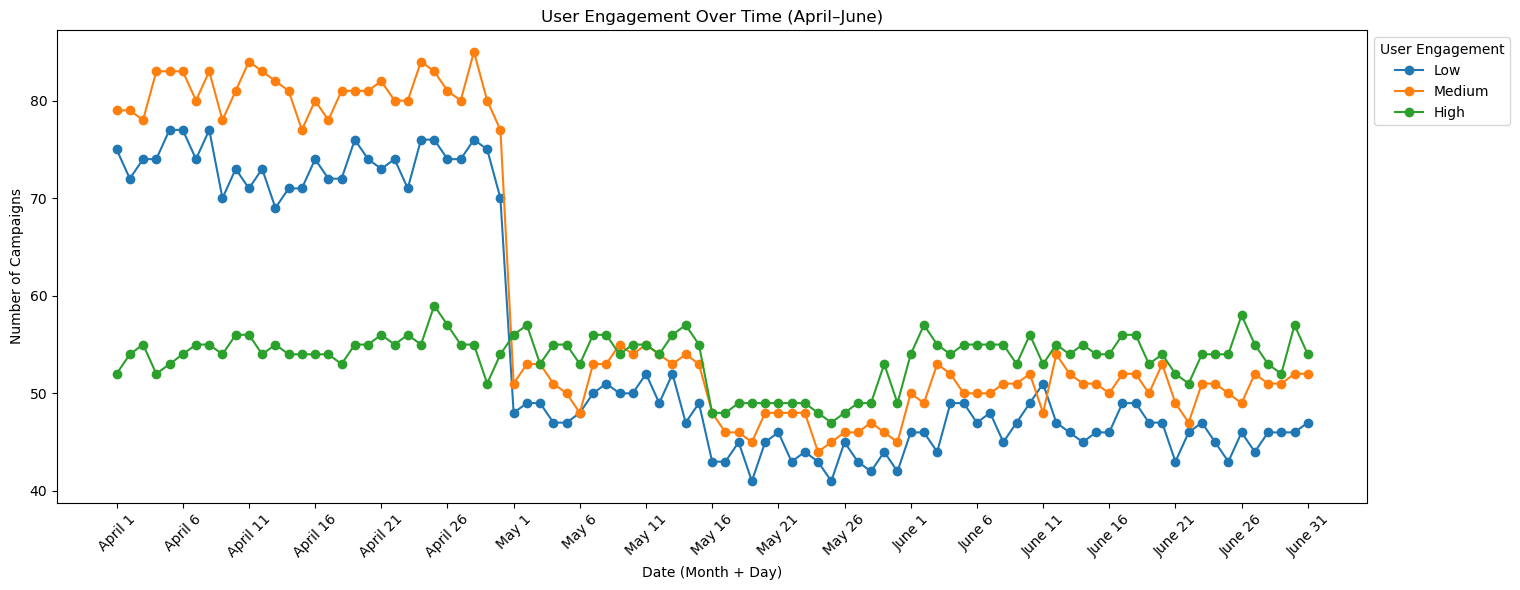

In [30]:
#Creating a visualization of user engagement overtime
month_map = {'April': 4, 'May': 5, 'June': 6}
df['month_day'] = df['month_name'] + ' ' + df['day'].astype(str)

overtime_engagement = df.groupby(['month_day', 'user_engagement']).size().unstack()

#Adding sort key 
overtime_engagement['sort_key'] = overtime_engagement.index.map(
    lambda x: f"{month_map[x.split()[0]]}-{int(x.split()[1]):02d}"
)

#Sorting the index
overtime_engagement = overtime_engagement.sort_values('sort_key').drop(columns='sort_key')

fig, ax = plt.subplots(figsize=(18, 6))

overtime_engagement.plot(kind='line', marker='o', ax=ax)

ax.set_title('User Engagement Over Time (April–June)')
ax.set_xlabel('Date (Month + Day)')
ax.set_ylabel('Number of Campaigns')

#Fewer ticks for better readability
ax.set_xticks(range(0, len(overtime_engagement), 5)) 
ax.set_xticklabels(overtime_engagement.index[::5], rotation=45)

ax.legend(['Low', 'Medium', 'High'], title='User Engagement',
          bbox_to_anchor=(1.0, 1.0), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


### How does the size of the ad (banner) impact the number of clicks generated?

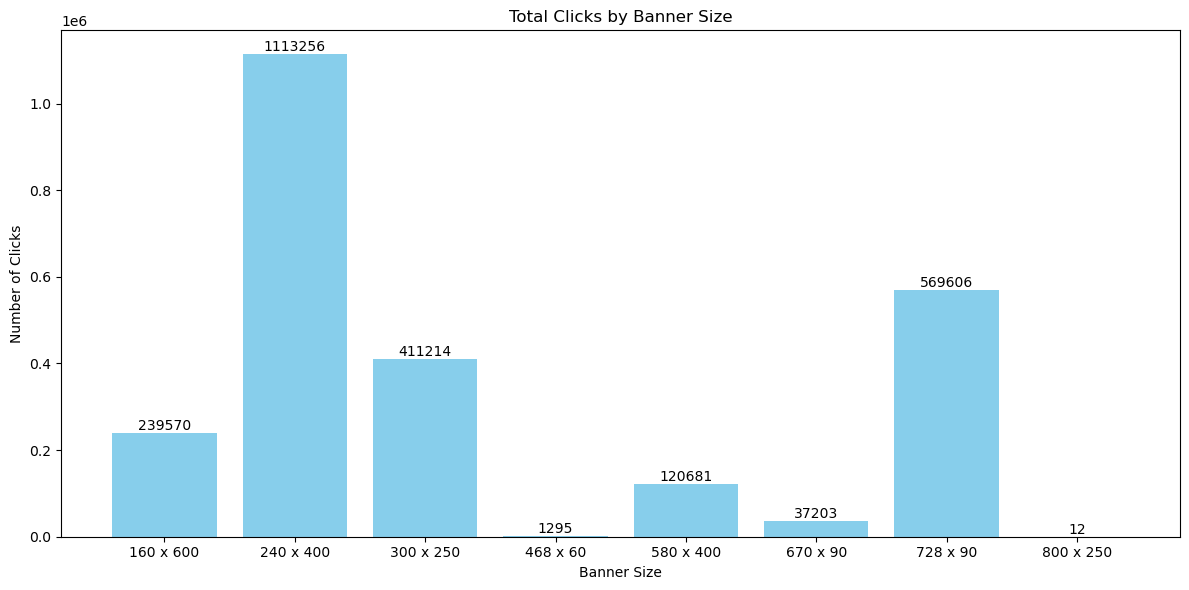

In [31]:
banner_clicks = df.groupby('banner_original')['clicks'].sum()

plt.figure(figsize=(12, 6))
bars = plt.bar(banner_clicks.index, banner_clicks.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title('Total Clicks by Banner Size')
plt.xlabel('Banner Size')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
